Import the required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,r2_score
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers,regularizers
import tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ab= pd.read_csv('/content/drive/MyDrive/Week26/Abalone_numeric.csv')
ab.head()

,Gender of Ablone,Length,Diameter,Height,Whole weight,Whole ablone Shucked weight,Visceral Weight,Shell Weight,number of rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
ab.isnull().sum().sum()

0

In [ ]:
X_data=ab.iloc[:,:-1]
X_data.head()

,Gender of Ablone,Length,Diameter,Height,Whole weight,Whole ablone Shucked weight,Visceral Weight,Shell Weight
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [ ]:
y_data=ab.iloc[:,-1]
y_data.head()

0    15
1     7
2     9
3    10
4     7
Name: number of rings, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.1, random_state = 7)

In [ ]:
# try fitting a ANN model
X_train = preprocessing.normalize(X_train)

In [ ]:
X_train1 = X_train
X_train1

array([[0.97270671, 0.14266365, 0.10699774, ..., 0.06387441, 0.02561461,
        0.0291812 ],
       [0.49041465, 0.3114133 , 0.25011147, ..., 0.30356667, 0.14957647,
        0.19126171],
       [0.96611858, 0.15135858, 0.11271383, ..., 0.05941629, 0.03188191,
        0.04669573],
       ...,
       [0.99142684, 0.09253317, 0.07270464, ..., 0.02181139, 0.00793141,
        0.00991427],
       [0.92835805, 0.26922384, 0.21352235, ..., 0.0399194 , 0.02367313,
        0.03713432],
       [0.98700416, 0.10857046, 0.08225035, ..., 0.03355814, 0.01299555,
        0.01710807]])

In [ ]:
X_test1 = X_test

In [ ]:
X_train1 = preprocessing.normalize(X_train1)

In [ ]:
model=Sequential()
#1st hidden layer
model.add(Dense(10,input_dim=8,activation='relu'))
#output layer
model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                90        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#compile ANN
model.compile(optimizer='Adam',loss='mse')

#fit and display the summary
model.fit(X_train1,y_train,epochs=400,verbose=1)

Epoch 1/400
118/118 [==============================] - 1s 2ms/step - loss: 4.2144
Epoch 2/400
118/118 [==============================] - 0s 2ms/step - loss: 4.2072
Epoch 3/400
118/118 [==============================] - 0s 2ms/step - loss: 4.2210
Epoch 4/400
118/118 [==============================] - 0s 2ms/step - loss: 4.2133
Epoch 5/400
118/118 [==============================] - 0s 2ms/step - loss: 4.2230
Epoch 6/400
118/118 [==============================] - 0s 2ms/step - loss: 4.2073
Epoch 7/400
118/118 [==============================] - 0s 2ms/step - loss: 4.1971
Epoch 8/400
118/118 [==============================] - 0s 2ms/step - loss: 4.1935
Epoch 9/400
118/118 [==============================] - 0s 2ms/step - loss: 4.1879
Epoch 10/400
118/118 [==============================] - 0s 2ms/step - loss: 4.2209
Epoch 11/400
118/118 [==============================] - 0s 2ms/step - loss: 4.1877
Epoch 12/400
118/118 [==============================] - 0s 2ms/step - loss: 4.1950
Epoch 13/400


In [ ]:
X_test1 = preprocessing.normalize(X_test1)

In [ ]:
y_pred=model.predict(X_test1)

14/14 [==============================] - 0s 2ms/step


In [ ]:
# find the MSE And MAE for the evaluation
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

MSE: 4.899616774621658
MAE: 1.5347918460243626


Text(0.5, 1.0, 'ANN-Act vs Pred')

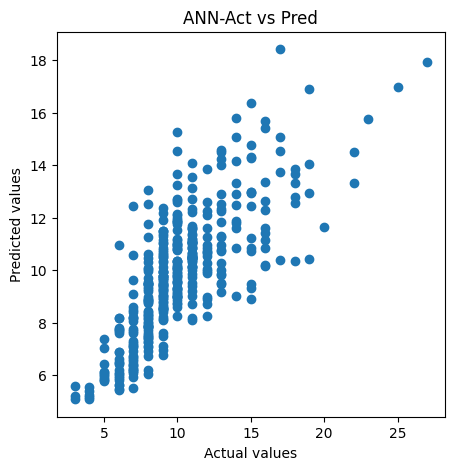

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("ANN-Act vs Pred")

In [ ]:
pd.value_counts(ab['Gender of Ablone'])

Gender of Ablone
1    1528
3    1342
2    1307
Name: count, dtype: int64

**two hidden layers**

In [ ]:
model=Sequential()
#1st hidden layer
model.add(Dense(10,input_dim=8,activation='relu'))
#2nd hidden layer
model.add(Dense(10,input_dim=8,activation='relu'))
#output layer
model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 10)                90        
                                                                 
 dense_40 (Dense)            (None, 10)                110       
                                                                 
 dense_41 (Dense)            (None, 1)                 11        
                                                                 
Total params: 211 (844.00 Byte)
Trainable params: 211 (844.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#compile ANN
model.compile(optimizer='Adam',loss='mse')

#fit and display the summary
model.fit(X_train1,y_train,epochs=400,verbose=1)

Epoch 1/400
118/118 [==============================] - 2s 3ms/step - loss: 4.2041
Epoch 2/400
118/118 [==============================] - 0s 3ms/step - loss: 4.2788
Epoch 3/400
118/118 [==============================] - 0s 3ms/step - loss: 4.1922
Epoch 4/400
118/118 [==============================] - 0s 2ms/step - loss: 4.2140
Epoch 5/400
118/118 [==============================] - 0s 2ms/step - loss: 4.2046
Epoch 6/400
118/118 [==============================] - 0s 2ms/step - loss: 4.1982
Epoch 7/400
118/118 [==============================] - 0s 3ms/step - loss: 4.2033
Epoch 8/400
118/118 [==============================] - 0s 2ms/step - loss: 4.2187
Epoch 9/400
118/118 [==============================] - 0s 2ms/step - loss: 4.2431
Epoch 10/400
118/118 [==============================] - 0s 2ms/step - loss: 4.2070
Epoch 11/400
118/118 [==============================] - 0s 2ms/step - loss: 4.2063
Epoch 12/400
118/118 [==============================] - 0s 2ms/step - loss: 4.2402
Epoch 13/400


In [ ]:
X_test1 = preprocessing.normalize(X_test1)

In [ ]:
y_pred=model.predict(X_test1)

14/14 [==============================] - 0s 1ms/step


In [ ]:
# find the MSE And MAE for the evaluation
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

MSE: 4.857187596218378
MAE: 1.5337796017313687


Text(0.5, 1.0, 'ANN-Act vs Pred')

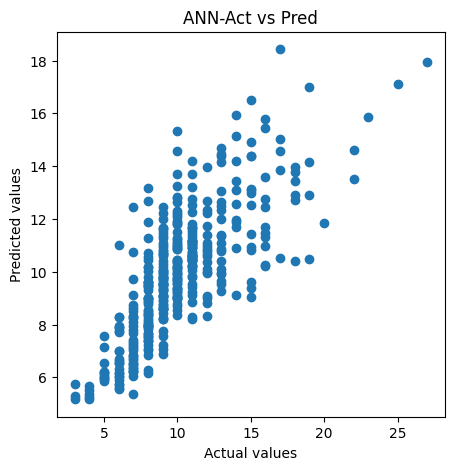

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("ANN-Act vs Pred")

In [ ]:
pd.value_counts(ab['Gender of Ablone'])

Gender of Ablone
1    1528
3    1342
2    1307
Name: count, dtype: int64

using three layers

In [ ]:
model=Sequential()
#1st hidden layer
model.add(Dense(10,input_dim=8,activation='relu'))
#2nd hidden layer
model.add(Dense(10,input_dim=8,activation='relu'))
#3rd hidden layer
model.add(Dense(10,input_dim=8,activation='relu'))
#output layer
model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                90        
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#compile ANN
model.compile(optimizer='Adam',loss='mse')

#fit and display the summary
model.fit(X_train1,y_train,epochs=400,verbose=1)

Epoch 1/400
118/118 [==============================] - 1s 2ms/step - loss: 105.3710
Epoch 2/400
118/118 [==============================] - 0s 2ms/step - loss: 79.7383
Epoch 3/400
118/118 [==============================] - 0s 2ms/step - loss: 18.3450
Epoch 4/400
118/118 [==============================] - 0s 2ms/step - loss: 7.7649
Epoch 5/400
118/118 [==============================] - 0s 2ms/step - loss: 7.6036
Epoch 6/400
118/118 [==============================] - 0s 2ms/step - loss: 7.4708
Epoch 7/400
118/118 [==============================] - 0s 2ms/step - loss: 7.3681
Epoch 8/400
118/118 [==============================] - 0s 2ms/step - loss: 7.2857
Epoch 9/400
118/118 [==============================] - 0s 2ms/step - loss: 7.2213
Epoch 10/400
118/118 [==============================] - 0s 2ms/step - loss: 7.1646
Epoch 11/400
118/118 [==============================] - 0s 2ms/step - loss: 7.1041
Epoch 12/400
118/118 [==============================] - 0s 2ms/step - loss: 7.0468
Epoch 13/

In [ ]:
X_test1 = preprocessing.normalize(X_test1)

In [ ]:
y_pred=model.predict(X_test1)

14/14 [==============================] - 0s 2ms/step


In [ ]:
# find the MSE And MAE for the evaluation
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

MSE: 4.634957881758213
MAE: 1.520181201861806


Text(0.5, 1.0, 'ANN-Act vs Pred')

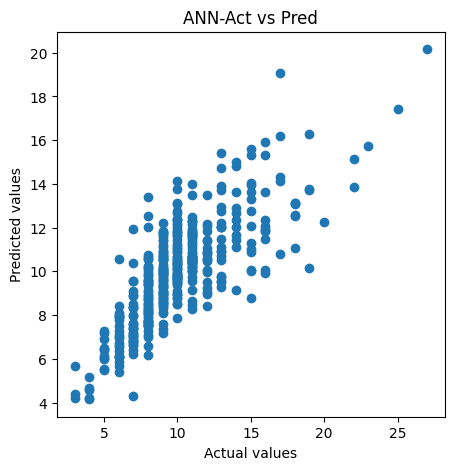

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("ANN-Act vs Pred")

In [ ]:
pd.value_counts(ab['Gender of Ablone'])

Gender of Ablone
1    1528
3    1342
2    1307
Name: count, dtype: int64

**Using three hidden layers**

In [ ]:
model=Sequential()
#1st hidden layer
model.add(Dense(10,input_dim=8,activation='relu'))
#2nd hidden layer
model.add(Dense(10,input_dim=8,activation='relu'))
#3rd hidden layer
model.add(Dense(10,input_dim=8,activation='relu'))
#output layer
model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                90        
                                                                 
 dense_36 (Dense)            (None, 10)                110       
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
 dense_38 (Dense)            (None, 1)                 11        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#compile ANN
model.compile(optimizer='Adam',loss='mse')

#fit and display the summary
model.fit(X_train1,y_train,epochs=400,verbose=1)

Epoch 1/400
118/118 [==============================] - 1s 2ms/step - loss: 101.9199
Epoch 2/400
118/118 [==============================] - 0s 2ms/step - loss: 35.0135
Epoch 3/400
118/118 [==============================] - 0s 2ms/step - loss: 7.7878
Epoch 4/400
118/118 [==============================] - 0s 2ms/step - loss: 7.5785
Epoch 5/400
118/118 [==============================] - 0s 2ms/step - loss: 7.4499
Epoch 6/400
118/118 [==============================] - 0s 2ms/step - loss: 7.3594
Epoch 7/400
118/118 [==============================] - 0s 2ms/step - loss: 7.2991
Epoch 8/400
118/118 [==============================] - 0s 2ms/step - loss: 7.2215
Epoch 9/400
118/118 [==============================] - 0s 2ms/step - loss: 7.1455
Epoch 10/400
118/118 [==============================] - 0s 2ms/step - loss: 7.0592
Epoch 11/400
118/118 [==============================] - 0s 2ms/step - loss: 6.9608
Epoch 12/400
118/118 [==============================] - 0s 2ms/step - loss: 6.8764
Epoch 13/4

In [ ]:
X_test1 = preprocessing.normalize(X_test1)

In [ ]:
y_pred=model.predict(X_test1)

14/14 [==============================] - 0s 2ms/step


In [ ]:
# find the MSE And MAE for the evaluation
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

MSE: 4.768399237566932
MAE: 1.5171251593594346


Text(0.5, 1.0, 'ANN-Act vs Pred')

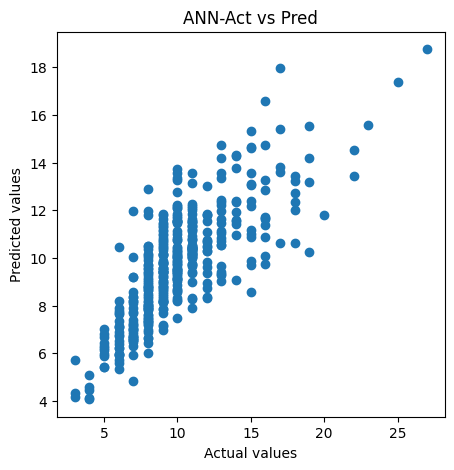

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("ANN-Act vs Pred")

**Using four layers**

In [ ]:
model=Sequential()
#1st hidden layer
model.add(Dense(10,input_dim=8,activation='relu'))
#2nd hidden layer
model.add(Dense(10,input_dim=8,activation='relu'))
#3rd hidden layer
model.add(Dense(10,input_dim=8,activation='relu'))
#4th hidden layer
model.add(Dense(10,input_dim=8,activation='relu'))
#output layer
model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 10)                90        
                                                                 
 dense_31 (Dense)            (None, 10)                110       
                                                                 
 dense_32 (Dense)            (None, 10)                110       
                                                                 
 dense_33 (Dense)            (None, 10)                110       
                                                                 
 dense_34 (Dense)            (None, 1)                 11        
                                                                 
Total params: 431 (1.68 KB)
Trainable params: 431 (1.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#compile ANN
model.compile(optimizer='Adam',loss='mse')

#fit and display the summary
model.fit(X_train1,y_train,epochs=400,verbose=1)

Epoch 1/400
118/118 [==============================] - 1s 2ms/step - loss: 82.9216
Epoch 2/400
118/118 [==============================] - 0s 2ms/step - loss: 11.5074
Epoch 3/400
118/118 [==============================] - 0s 2ms/step - loss: 7.6868
Epoch 4/400
118/118 [==============================] - 0s 2ms/step - loss: 7.0973
Epoch 5/400
118/118 [==============================] - 0s 2ms/step - loss: 6.9715
Epoch 6/400
118/118 [==============================] - 0s 2ms/step - loss: 6.8580
Epoch 7/400
118/118 [==============================] - 0s 2ms/step - loss: 6.7514
Epoch 8/400
118/118 [==============================] - 0s 2ms/step - loss: 6.6313
Epoch 9/400
118/118 [==============================] - 0s 2ms/step - loss: 6.5520
Epoch 10/400
118/118 [==============================] - 0s 2ms/step - loss: 6.4371
Epoch 11/400
118/118 [==============================] - 0s 2ms/step - loss: 6.3419
Epoch 12/400
118/118 [==============================] - 0s 2ms/step - loss: 6.2030
Epoch 13/40

In [ ]:
X_test1 = preprocessing.normalize(X_test1)

In [ ]:
y_pred=model.predict(X_test1)

14/14 [==============================] - 0s 2ms/step


In [ ]:
# find the MSE And MAE for the evaluation
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

MSE: 4.765497226861544
MAE: 1.527624917372562


Text(0.5, 1.0, 'ANN-Act vs Pred')

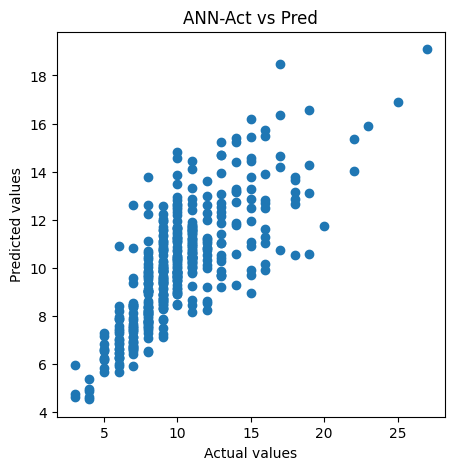

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("ANN-Act vs Pred")

Using 5 hidden layers

In [ ]:
model=Sequential()
#1st hidden layer
model.add(Dense(10,input_dim=8,activation='relu'))
#2nd hidden layer
model.add(Dense(10,input_dim=8,activation='relu'))
#3rd hidden layer
model.add(Dense(10,input_dim=8,activation='relu'))
#4th hidden layer
model.add(Dense(10,input_dim=8,activation='relu'))
#5th hidden layer
model.add(Dense(10,input_dim=8,activation='relu'))
#output layer
model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                90        
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
 dense_27 (Dense)            (None, 10)                110       
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 541 (2.11 KB)
Trainable params: 541 (2.1

In [ ]:
#compile ANN
model.compile(optimizer='Adam',loss='mse')

#fit and display the summary
model.fit(X_train1,y_train,epochs=400,verbose=1)

Epoch 1/400
118/118 [==============================] - 1s 2ms/step - loss: 83.2848
Epoch 2/400
118/118 [==============================] - 0s 2ms/step - loss: 8.2541
Epoch 3/400
118/118 [==============================] - 0s 2ms/step - loss: 7.0919
Epoch 4/400
118/118 [==============================] - 0s 2ms/step - loss: 6.9300
Epoch 5/400
118/118 [==============================] - 0s 2ms/step - loss: 6.8483
Epoch 6/400
118/118 [==============================] - 0s 2ms/step - loss: 6.7687
Epoch 7/400
118/118 [==============================] - 0s 2ms/step - loss: 6.7156
Epoch 8/400
118/118 [==============================] - 0s 2ms/step - loss: 6.6580
Epoch 9/400
118/118 [==============================] - 0s 2ms/step - loss: 6.6191
Epoch 10/400
118/118 [==============================] - 0s 2ms/step - loss: 6.5545
Epoch 11/400
118/118 [==============================] - 0s 2ms/step - loss: 6.5040
Epoch 12/400
118/118 [==============================] - 0s 2ms/step - loss: 6.4654
Epoch 13/400

In [ ]:
X_test1 = preprocessing.normalize(X_test1)

In [ ]:
y_pred=model.predict(X_test1)

14/14 [==============================] - 0s 2ms/step


In [ ]:
# find the MSE And MAE for the evaluation
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

MSE: 4.819157619695739
MAE: 1.5152788698388058


Text(0.5, 1.0, 'ANN-Act vs Pred')

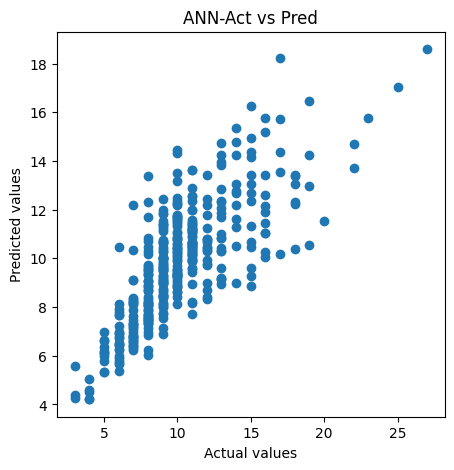

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("ANN-Act vs Pred")

In [ ]:
pd.value_counts(ab['Gender of Ablone'])

Gender of Ablone
1    1528
3    1342
2    1307
Name: count, dtype: int64